We start off by importing pandas and matplotlib to create dataframes and visualizations with.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log as ln
import warnings
warnings.filterwarnings("ignore")

We then take a look at all of the data we will be using in this project.

In [8]:
from os import listdir
for f in listdir("Data"):
    print(f)

Actions_Taken_During_Stop.csv
Perceived_Race.csv
Reason_for_Stop.csv
Result_of_Stop.csv
Stop_Date_Time_Location_Other.csv


Next we import the data into data frames for each of the part of the data. note that we are dropping the object ID from all of the data frames becuase it was the indexing used in the csv format which is no longer nessesary in pandas.

In [2]:
actions = pd.read_csv("Data/Actions_Taken_During_Stop.csv").drop("ObjectId", axis=1)
race = pd.read_csv("Data/Perceived_Race.csv").drop("ObjectId", axis=1)
reason = pd.read_csv("Data/Reason_for_Stop.csv").drop("ObjectId", axis=1)
result = pd.read_csv("Data/Result_of_Stop.csv").drop("ObjectId", axis=1)
time_location = pd.read_csv("Data/Stop_Date_Time_Location_Other.csv").drop("ObjectId", axis=1)

Now we take a look at some of the details of the data and the first few entries of each dataframe.

In [34]:
actions.describe()

,StopID,PID
count,59801.000000,59801.000000
mean,26693.278290,1.187973
std,14530.785469,0.750050
min,5782.000000,1.000000
25%,14679.000000,1.000000
50%,23544.000000,1.000000
75%,39839.000000,1.000000
max,57933.000000,19.000000


In [35]:
actions.head()

,StopID,PID,actionTakenDuringStop,personSearchConsentGiven,propertySearchConsentGiven
0,5873,1,None,NaN,NaN
1,5839,1,None,NaN,NaN
2,5782,1,Curbside detention,NaN,NaN
3,6014,1,Handcuffed or flex cuffed,NaN,NaN
4,5874,1,Handcuffed or flex cuffed,NaN,NaN


In [15]:
actions["StopID"].value_counts()

20856    92
12057    38
15237    38
15139    31
13252    30
         ..
52554     1
15700     1
23896     1
21849     1
6147      1
Name: StopID, Length: 36788, dtype: int64

From this analysis we can see that StopID is not a primary ID becuase several StopIDs are repeated multiple times in the dataset. We specically also notice that stop ID 20856 is much higher than any other stop ID so we take a deeper look into why that may be the case.

In [19]:
actions[actions["StopID"] == 20856]

,ObjectId,StopID,PID,actionTakenDuringStop,personSearchConsentGiven,propertySearchConsentGiven
25205,25206,20856,6,Curbside detention,NaN,NaN
25207,25208,20856,6,Firearm pointed at person,NaN,NaN
25209,25210,20856,6,Person removed from vehicle by order,NaN,NaN
25212,25213,20856,6,Search of person was conducted,NaN,NaN
25215,25216,20856,6,Search of property was conducted,NaN,NaN
...,...,...,...,...,...,...
25375,25376,20856,13,Person removed from vehicle by order,NaN,NaN
25381,25382,20856,13,Search of person was conducted,NaN,NaN
25387,25388,20856,13,Search of property was conducted,NaN,NaN
25393,25394,20856,14,Asked for consent to search person,True,NaN


We can see that a firearm was pointed at a person which may indicate an extreme situation. To learn more about what happend we take a look at the reason dataframe for possible answers.

In [21]:
reason[reason["StopID"] == 20856]

,ObjectId,StopID,PID,reasonForStop,reasonForStopDetail,reasonForStopcode,reasonForStopCodeText
16859,16860,20856,3,Reasonable Suspicion,Matched suspect description,52479,25400(A)(1) PC - CCW IN VEHICLE (F) 52479
16875,16876,20856,4,Reasonable Suspicion,Matched suspect description,52479,25400(A)(1) PC - CCW IN VEHICLE (F) 52479
16880,16881,20856,5,Reasonable Suspicion,Matched suspect description,52479,25400(A)(1) PC - CCW IN VEHICLE (F) 52479
16885,16886,20856,6,Reasonable Suspicion,Matched suspect description,52479,25400(A)(1) PC - CCW IN VEHICLE (F) 52479
16890,16891,20856,7,Reasonable Suspicion,Matched suspect description,52479,25400(A)(1) PC - CCW IN VEHICLE (F) 52479
16895,16896,20856,8,Reasonable Suspicion,Matched suspect description,52479,25400(A)(1) PC - CCW IN VEHICLE (F) 52479
16944,16945,20856,9,Reasonable Suspicion,Matched suspect description,52479,25400(A)(1) PC - CCW IN VEHICLE (F) 52479
16946,16947,20856,10,Reasonable Suspicion,Matched suspect description,52479,25400(A)(1) PC - CCW IN VEHICLE (F) 52479
16950,16951,20856,11,Reasonable Suspicion,Matched suspect description,52479,25400(A)(1) PC - CCW IN VEHICLE (F) 52479
16954,16955,20856,12,Reasonable Suspicion,Matched suspect description,52479,25400(A)(1) PC - CCW IN VEHICLE (F) 52479


From the reason for stop code we can see that all of these stopIDs are for CCW in vehicle, which from a quick google search we can see means that they individuals were carrying concealed weapeons in their vehicle. We now look at the date and location entries in hopes that we can potentially find a news article or report on what happened to gain further clearity on the data.

In [37]:
time_location[time_location["StopID"] == 20856]

,StopID,stopDate,stopTime,stopDuration,stopInResponseToCFS,blockNumber,street,intersection,highwayExit,landMark,city,isSchool,schoolName,PID,isStudent,perceivedAge,perceivedGender,genderNonconforming,perceivedLgbt,perceivedLimitedEnglish
16400,20856,2019/04/20 00:00:00,2020/06/26 22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,12,0,30,Male,0,No,0
16402,20856,2019/04/20 00:00:00,2020/06/26 22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,13,0,50,Male,0,No,0
16403,20856,2019/04/20 00:00:00,2020/06/26 22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,14,0,24,Male,0,No,0
16653,20856,2019/04/20 00:00:00,2020/06/26 22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,1,0,24,Male,0,No,0
16654,20856,2019/04/20 00:00:00,2020/06/26 22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,2,0,28,Female,0,No,0
16655,20856,2019/04/20 00:00:00,2020/06/26 22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,3,0,45,Male,0,No,1
16656,20856,2019/04/20 00:00:00,2020/06/26 22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,4,0,55,Male,0,No,1
16657,20856,2019/04/20 00:00:00,2020/06/26 22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,5,0,25,Transgender woman/girl,0,Yes,0
16658,20856,2019/04/20 00:00:00,2020/06/26 22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,6,0,20,Male,0,No,0
16659,20856,2019/04/20 00:00:00,2020/06/26 22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,7,0,60,Male,0,No,0


We now run into one of the first problems with our data set in the stopDate and stopTime columns. We can see that the stop dates and stop times both have dates and times so we need to further investigate how we should clean the data. Note that we take a sample to account for the ordering that the data set has.

In [36]:
time_location.sample(10)

,StopID,stopDate,stopTime,stopDuration,stopInResponseToCFS,blockNumber,street,intersection,highwayExit,landMark,city,isSchool,schoolName,PID,isStudent,perceivedAge,perceivedGender,genderNonconforming,perceivedLgbt,perceivedLimitedEnglish
26433,30142,2019/07/15 00:00:00,2020/06/26 10:57:44,10,0,1800.0,Long Beach Blvd,NaN,NaN,NaN,LONG BEACH,0,NaN,1,0,22,Male,0,No,0
28379,37198,2019/07/27 00:00:00,2020/06/26 07:41:00,8,0,100.0,W 1st,NaN,NaN,NaN,LONG BEACH,0,NaN,1,0,43,Male,0,No,0
26607,30034,2019/07/14 00:00:00,2020/06/26 01:31:00,5,0,100.0,E pch,NaN,NaN,NaN,LONG BEACH,0,NaN,1,0,30,Male,0,No,0
26562,30177,2019/07/15 00:00:00,2020/06/26 19:40:03,5,0,NaN,Pine,Shoreline,NaN,NaN,LONG BEACH,0,NaN,1,0,30,Male,0,No,0
13203,17749,2019/03/27 00:00:00,2020/06/26 11:50:00,8,0,NaN,Anaheim st,Broadway ct,NaN,NaN,LONG BEACH,0,NaN,1,0,35,Female,0,No,0
36682,49308,2019/11/01 00:00:00,2020/06/26 19:12:08,10,0,2700.0,67th St,NaN,NaN,NaN,LONG BEACH,0,NaN,1,0,50,Male,0,No,0
27307,35723,2019/07/22 00:00:00,2020/06/26 07:41:00,4,0,NaN,NaN,willow / 605,NaN,NaN,LONG BEACH,0,NaN,1,0,35,Female,0,No,0
19264,23264,2019/05/14 00:00:00,2020/06/26 12:25:06,15,0,2700.0,E PCH,NaN,NaN,NaN,LONG BEACH,0,NaN,1,0,28,Female,0,No,0
24014,27833,2019/06/25 00:00:00,2020/06/26 21:20:00,10,0,NaN,NaN,Anaheim / Oregon,NaN,NaN,LONG BEACH,0,NaN,1,0,25,Male,0,No,0
37080,50552,2019/11/05 00:00:00,2020/06/26 15:20:00,200,0,4100.0,Donald Douglas Dr,NaN,NaN,NaN,LONG BEACH,0,NaN,1,0,50,Male,0,No,0


We can see from the random sample that all of the times in the stopDate seem to be the same and all of the dates in the stopTime seem to be the same as well. From this observation I made the assumption that the stopDates contain only the correct dates and the stop time only contains the correct times. We now clean up the data to make both the stopDate and stopTime data.

In [5]:

time_location["stopDate"] = pd.to_datetime(time_location["stopDate"]).dt.date
time_location["stopTime"] = pd.to_datetime(time_location["stopTime"]).dt.time
time_location

,StopID,stopDate,stopTime,stopDuration,stopInResponseToCFS,blockNumber,street,intersection,highwayExit,landMark,city,isSchool,schoolName,PID,isStudent,perceivedAge,perceivedGender,genderNonconforming,perceivedLgbt,perceivedLimitedEnglish
0,5875,2019-01-01,07:41:59,5,0,200.0,E First St,NaN,NaN,NaN,LONG BEACH,0,NaN,1,0,60,Male,0,No,0
1,5782,2019-01-01,00:04:59,5,1,5900.0,Long Beach Blvd,NaN,NaN,NaN,LONG BEACH,0,NaN,1,0,31,Female,0,No,0
2,5876,2019-01-01,18:17:00,4,0,6600.0,Butler Ave,NaN,NaN,NaN,LONG BEACH,0,NaN,1,0,30,Male,0,No,0
3,5877,2019-01-01,18:25:35,10,1,900.0,E anaheim,NaN,NaN,NaN,LONG BEACH,0,NaN,1,0,40,Male,0,No,0
4,5785,2019-01-01,01:04:00,16,0,4800.0,Vista street,NaN,NaN,NaN,LONG BEACH,0,NaN,1,0,40,Male,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40518,57852,2019-12-31,10:04:52,10,0,2900.0,Easy Ave,NaN,NaN,NaN,LONG BEACH,0,NaN,1,0,65,Male,0,No,0
40519,57853,2019-12-31,10:09:00,6,0,1400.0,W Spring St,NaN,NaN,NaN,LONG BEACH,0,NaN,1,0,40,Male,0,No,0
40520,57854,2019-12-31,10:29:15,10,0,5300.0,E 7th St,NaN,NaN,NaN,LONG BEACH,0,NaN,1,0,40,Female,0,No,0
40521,57855,2019-12-31,09:59:59,10,0,2500.0,Atlantic,NaN,NaN,NaN,LONG BEACH,0,NaN,1,0,40,Male,0,No,0


Now that we have cleaned our data lets take a look at the stopID one more time to see what we can learn about it.

In [47]:
time_location[time_location["StopID"] == 20856]

,StopID,stopDate,stopTime,stopDuration,stopInResponseToCFS,blockNumber,street,intersection,highwayExit,landMark,city,isSchool,schoolName,PID,isStudent,perceivedAge,perceivedGender,genderNonconforming,perceivedLgbt,perceivedLimitedEnglish
16400,20856,2019-04-20,22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,12,0,30,Male,0,No,0
16402,20856,2019-04-20,22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,13,0,50,Male,0,No,0
16403,20856,2019-04-20,22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,14,0,24,Male,0,No,0
16653,20856,2019-04-20,22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,1,0,24,Male,0,No,0
16654,20856,2019-04-20,22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,2,0,28,Female,0,No,0
16655,20856,2019-04-20,22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,3,0,45,Male,0,No,1
16656,20856,2019-04-20,22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,4,0,55,Male,0,No,1
16657,20856,2019-04-20,22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,5,0,25,Transgender woman/girl,0,Yes,0
16658,20856,2019-04-20,22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,6,0,20,Male,0,No,0
16659,20856,2019-04-20,22:26:34,25,0,200.0,Wardlow,NaN,NaN,NaN,LONG BEACH,0,NaN,7,0,60,Male,0,No,0


From KTLA it looks like this stop could have potentially been from an officer involved shooting and an increased police presence. https://ktla.com/news/local-news/person-wounded-in-south-los-angeles-officer-involved-shooting/ Now lets take a look at some demographic information provided in the data set.

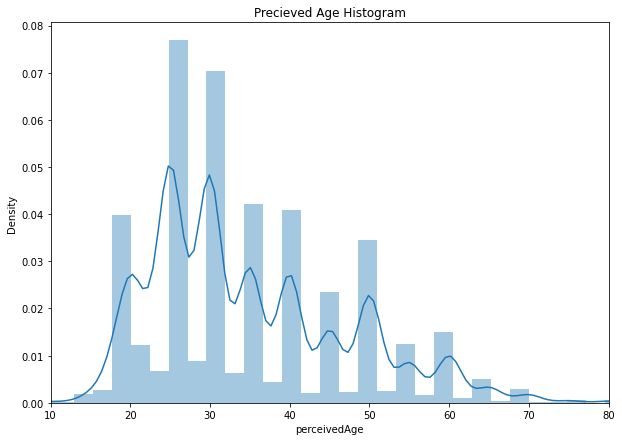

In [67]:
plt.figure(figsize=(10,7))
sns.distplot(time_location['perceivedAge'], label = 'Percieved Age')
plt.title("Precieved Age Histogram")
plt.xlim(10, 80);

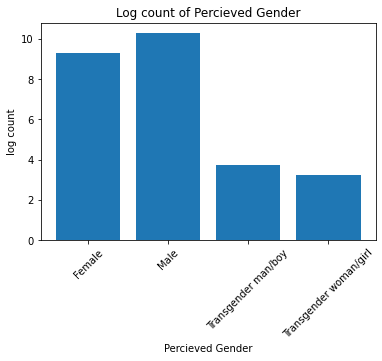

In [78]:
gender = time_location.groupby("perceivedGender").size()
plt.bar(gender.index, ln(gender.values))
plt.ylabel("log count")
plt.title("Log count of Percieved Gender")
plt.xlabel("Percieved Gender")
plt.xticks(rotation=45);

In [7]:
race.head()

,StopID,PID,perceivedRace
0,5782,1,White
1,5785,1,White
2,5786,1,White
3,5787,1,Asian
4,5787,1,Black


In [8]:
reason.head()

,StopID,PID,reasonForStop,reasonForStopDetail,reasonForStopcode,reasonForStopCodeText
0,5782,1,Reasonable Suspicion,Other Reasonable Suspicion of a crime,38021,273(A) PC - ILLEGAL PAY FOR ADOPTION (M) 38021
1,5785,1,Reasonable Suspicion,Other Reasonable Suspicion of a crime,65002,65002 ZZ - LOCAL ORDINANCE VIOL (I) 65002
2,5786,1,Reasonable Suspicion,Other Reasonable Suspicion of a crime,32096,602(L)(1) PC - TRSPSS:PSTD LND:RFS TO LV (M) 3...
3,5787,1,Reasonable Suspicion,Other Reasonable Suspicion of a crime,38080,273.5(A) PC - CRPL INJ:SPOUS/COHAB/DATE (F) 38080
4,5788,1,Traffic Violation,Moving Violation,54098,21453(A) VC - FAIL STOP LINE/ETC AT RED (I) 54098


In [9]:
result.head()

,StopID,PID,resultOfStop,resultOfStopcode,resultOfStopcodeText
0,5782,1,Field interview card completed,NaN,NaN
1,5867,1,Citation for infraction,55103.0,374.4 PC - LITTER PUB/PRIVATE PROP (I) 55103
2,5908,1,Citation for infraction,54109.0,24252(A) VC - FAIL MAINT VEH LITE EQUIP (I) 54109
3,6033,1,Citation for infraction,54372.0,21453(B) VC - TURN ONTO ONEWAY AT RED (I) 54372
4,5785,1,Citation for infraction,65000.0,65000 ZZ - LOCAL ORDINANCE VIOL (M) 65000


In [11]:
actions.head()

,StopID,PID,actionTakenDuringStop,personSearchConsentGiven,propertySearchConsentGiven
0,5873,1,None,NaN,NaN
1,5839,1,None,NaN,NaN
2,5782,1,Curbside detention,NaN,NaN
3,6014,1,Handcuffed or flex cuffed,NaN,NaN
4,5874,1,Handcuffed or flex cuffed,NaN,NaN


In [13]:
race["perceivedRace"].value_counts()/len(race)

Hispanic                         0.347418
Black                            0.259212
White                            0.228037
Asian                            0.065468
Middle Eastern or South Asian    0.037494
Pacific Islander                 0.035332
Native American                  0.027039
Name: perceivedRace, dtype: float64